In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
filename_train = './data/yellow_tripdata_2022-01.parquet'
filename_val = './data/yellow_tripdata_2022-02.parquet'

In [3]:
df_train = pd.read_parquet(filename_train)
df_val = pd.read_parquet(filename_val)

In [4]:
def prepare_df(df: pd.DataFrame, cat_features: list = ['PULocationID','DOLocationID'], log: bool = False):
    if log:
        n_col = len(df.columns)
        print(f'Q1: Number of columns in Jan 2022 Yellow Taxi Trip data -- {n_col}')
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.apply(lambda td: td.total_seconds()/60)

    if log:
        duration_std = df.duration.std()
        print(f'Q2: Standard deviation of the trips duration in Jan 2022 Yellow Taxi Trip data -- {duration_std}')
        outliers_fraction = ((df.duration >= 1)&(df.duration <= 60)).mean()
        print(f'Q3: Fraction of the records left after dropping the outliers -- {outliers_fraction}')

    df = df[(df.duration >= 1)&(df.duration <= 60)]

    df = df.astype(dict.fromkeys(cat_features, str))
    
    return df
    

In [5]:
def vectorize_X_y(df_train:pd.DataFrame, df_val:pd.DataFrame, cat_feature: list = ['PULocationID','DOLocationID'], target:str = 'duration'):
    dv = DictVectorizer()

    train_dics = df_train[cat_feature].to_dict(orient='records')
    X_train = dv.fit_transform(train_dics)
    y_train = df_train[target].values

    val_dics = df_val[cat_feature].to_dict(orient='records')
    X_val = dv.transform(val_dics)
    y_val = df_val[target].values

    return X_train,y_train, X_val,y_val, dv

In [6]:
df_train = prepare_df(df_train, log=True)
df_val = prepare_df(df_val)

X_train,y_train, X_val,y_val, dv = vectorize_X_y(df_train, df_val)

Q1: Number of columns in Jan 2022 Yellow Taxi Trip data -- 19
Q2: Standard deviation of the trips duration in Jan 2022 Yellow Taxi Trip data -- 46.44530513776802
Q3: Fraction of the records left after dropping the outliers -- 0.9827547930522406


In [7]:
print(f'Q4: Dimensionality after OHE -- {X_train.shape[1]}')

Q4: Dimensionality after OHE -- 515


In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
print(f'Q5: RMSE on train -- {rmse_train}')

y_pred = lr.predict(X_val)
rmse_val = mean_squared_error(y_val, y_pred, squared=False)
print(f'Q6: RMSE on validation -- {rmse_val}')

Q5: RMSE on train -- 6.98619123059128
Q6: RMSE on validation -- 7.786413522518241


/tmp/ipykernel_78081/3843849186.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='prediction')
/tmp/ipykernel_78081/3843849186.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,label='actual')


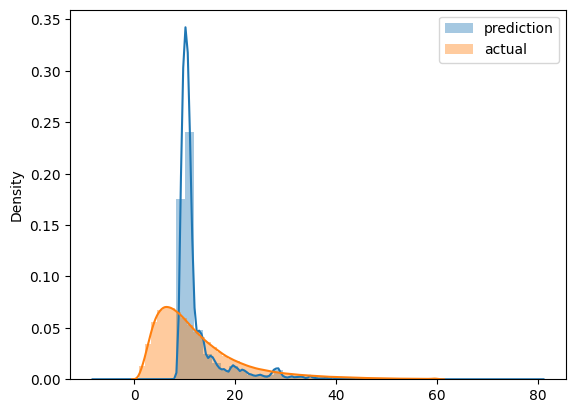

In [10]:
sns.distplot(y_pred,label='prediction')
sns.distplot(y_train,label='actual')

plt.legend()